In [3]:
import yfinance as yf
import pandas as pd
from datetime import datetime, timedelta
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import streamlit as st # type: ignore

In [4]:
# List of 30 cryptocurrencies
crypto_list = [
    'BTC-USD', 'ETH-USD', 'XRP-USD', 'LTC-USD', 'BCH-USD', 'ADA-USD', 'DOT-USD',
    'BNB-USD', 'LINK-USD', 'XLM-USD', 'DOGE-USD', 'UNI-USD', 'AAVE-USD', 'ATOM-USD',
    'AVAX-USD', 'MATIC-USD', 'SOL-USD', 'CHR-USD', 'ALGO-USD', 'FTT-USD', 'VET-USD',
    'FIL-USD', 'TRX-USD', 'ETC-USD', 'XMR-USD', 'EOS-USD', 'THETA-USD', 'NEO-USD',
    'DASH-USD', 'ZEC-USD'
]

# Fetch data for the past year (365 days)
def download_data(cryptos, duration):
    # Define the date range for the past year
    end_date = datetime.now()
    start_date = end_date - timedelta(days=int(duration-1))

    # Initialize an empty DataFrame to hold all the data
    data = pd.DataFrame()

    data = yf.download(cryptos, start=start_date, end=end_date)

    return data

In [5]:
df = download_data(crypto_list, 365) # crypto_list is the list of cryptocurrencies, duration is in days
df.head()

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  30 of 30 completed


Price            Close                                                        \
Ticker        AAVE-USD   ADA-USD  ALGO-USD   ATOM-USD   AVAX-USD     BCH-USD   
Date                                                                           
2024-04-11  117.844589  0.586191  0.227998  10.755186  46.057598  614.317261   
2024-04-12  100.094933  0.503575  0.194067   9.387263  39.417744  534.766052   
2024-04-13   82.869781  0.447908  0.168352   8.092050  34.078411  481.483765   
2024-04-14   88.107071  0.468911  0.179547   8.361626  37.316444  527.900879   
2024-04-15   84.922333  0.460795  0.170328   8.136924  35.157204  507.917206   

Price                                                      ...     Volume  \
Ticker         BNB-USD       BTC-USD   CHR-USD   DASH-USD  ...    NEO-USD   
Date                                                       ...              
2024-04-11  604.893799  70060.609375  0.392901  36.866966  ...  620542319   
2024-04-12  596.380127  67195.867188  0.334552  31.887470  ...  463093748   
2024-04-13  554.299805  63821.472656  0.326007  28.300234  ...  389415813   
2024-04-14  567.218445  65738.726562  0.339479  30.139847  ...  407325900   
2024-04-15  552.874512  63426.210938  0.314537  28.457460  ...  753574316   

Price                                                                       \
Ticker         SOL-USD  THETA-USD    TRX-USD UNI-USD    VET-USD    XLM-USD   
Date                                                                         
2024-04-11  2712334365   79221689  276293638      18  157927865   67600788   
2024-04-12  4727185451  123541852  528820521      17  296362744  228777165   
2024-04-13  8976793985  136894360  584646397      17  270395810  331911442   
2024-04-14  7110974218   83471583  439868653      17  151505775  239005618   
2024-04-15  5699439234   77166225  497080994      16  204253929  135893831   

Price                                       
Ticker       XMR-USD     XRP-USD   ZEC-USD  
Date                                        
2024-04-11  42712494  1218887360  56061716  
2024-04-12  53508223  2872824835  70722333  
2024-04-13  49104520  3957442555  72974977  
2024-04-14  51839602  2824792033  69039044  
2024-04-15  54461578  2356318423  54317886  

[5 rows x 150 columns]

In [6]:
df = df.drop(['High', 'Low', 'Open', 'Volume'], axis=1)
df=df.droplevel('Price', axis=1)
df.head()

Ticker,AAVE-USD,ADA-USD,ALGO-USD,ATOM-USD,AVAX-USD,BCH-USD,BNB-USD,BTC-USD,CHR-USD,DASH-USD,...,NEO-USD,SOL-USD,THETA-USD,TRX-USD,UNI-USD,VET-USD,XLM-USD,XMR-USD,XRP-USD,ZEC-USD
Date,,,,,,,,,,,,,,,,,,,,,
2024-04-11,117.844589,0.586191,0.227998,10.755186,46.057598,614.317261,604.893799,70060.609375,0.392901,36.866966,...,22.025585,172.576370,2.901548,0.120403,0.000210,0.048192,0.130300,133.369156,0.608880,26.541134
2024-04-12,100.094933,0.503575,0.194067,9.387263,39.417744,534.766052,596.380127,67195.867188,0.334552,31.887470,...,19.781090,153.635468,2.439062,0.114880,0.000202,0.043033,0.115299,122.996651,0.548414,23.274286
2024-04-13,82.869781,0.447908,0.168352,8.092050,34.078411,481.483765,554.299805,63821.472656,0.326007,28.300234,...,16.840794,139.341690,1.995765,0.110303,0.000192,0.040311,0.105686,115.678329,0.480819,20.502048
2024-04-14,88.107071,0.468911,0.179547,8.361626,37.316444,527.900879,567.218445,65738.726562,0.339479,30.139847,...,20.903723,151.284943,2.166781,0.112592,0.000197,0.042974,0.110763,121.533531,0.504258,21.958475
2024-04-15,84.922333,0.460795,0.170328,8.136924,35.157204,507.917206,552.874512,63426.210938,0.314537,28.457460,...,20.358377,138.508621,2.018784,0.111530,0.000190,0.041349,0.107625,123.288460,0.497731,21.236160


In [7]:
# Fill missing values with forward fill & backward fill
# Convert PeriodIndex to string
df.columns = df.columns.astype(str)

# Fill NaNs
df.fillna(method='ffill', inplace=True)

# Keep only numeric data
numeric_df = df.select_dtypes(include='number')

# Standardize
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_df.T).T
scaled_df = pd.DataFrame(scaled_data, index=numeric_df.index, columns=numeric_df.columns)


In [8]:
df.head()

Ticker,AAVE-USD,ADA-USD,ALGO-USD,ATOM-USD,AVAX-USD,BCH-USD,BNB-USD,BTC-USD,CHR-USD,DASH-USD,...,NEO-USD,SOL-USD,THETA-USD,TRX-USD,UNI-USD,VET-USD,XLM-USD,XMR-USD,XRP-USD,ZEC-USD
Date,,,,,,,,,,,,,,,,,,,,,
2024-04-11,117.844589,0.586191,0.227998,10.755186,46.057598,614.317261,604.893799,70060.609375,0.392901,36.866966,...,22.025585,172.576370,2.901548,0.120403,0.000210,0.048192,0.130300,133.369156,0.608880,26.541134
2024-04-12,100.094933,0.503575,0.194067,9.387263,39.417744,534.766052,596.380127,67195.867188,0.334552,31.887470,...,19.781090,153.635468,2.439062,0.114880,0.000202,0.043033,0.115299,122.996651,0.548414,23.274286
2024-04-13,82.869781,0.447908,0.168352,8.092050,34.078411,481.483765,554.299805,63821.472656,0.326007,28.300234,...,16.840794,139.341690,1.995765,0.110303,0.000192,0.040311,0.105686,115.678329,0.480819,20.502048
2024-04-14,88.107071,0.468911,0.179547,8.361626,37.316444,527.900879,567.218445,65738.726562,0.339479,30.139847,...,20.903723,151.284943,2.166781,0.112592,0.000197,0.042974,0.110763,121.533531,0.504258,21.958475
2024-04-15,84.922333,0.460795,0.170328,8.136924,35.157204,507.917206,552.874512,63426.210938,0.314537,28.457460,...,20.358377,138.508621,2.018784,0.111530,0.000190,0.041349,0.107625,123.288460,0.497731,21.236160


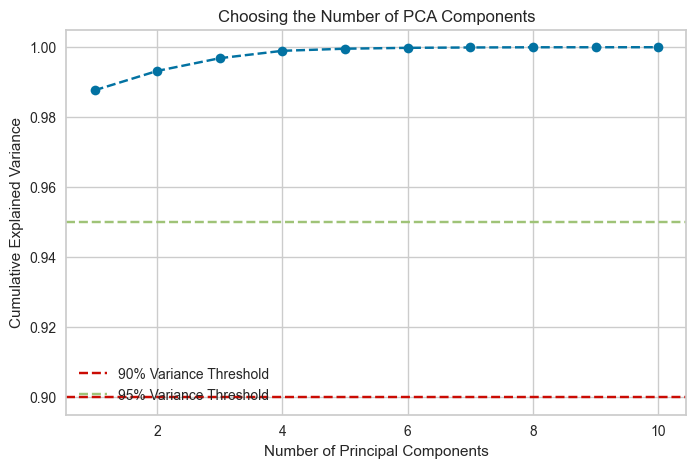

In [9]:
pca = PCA(n_components=10)
pca.fit(scaled_data)

# Plot Explained Variance
explained_variance = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(8,5))
plt.plot(range(1, 11), explained_variance, marker='o', linestyle='--', color='b')
plt.axhline(y=0.90, color='r', linestyle='--', label="90% Variance Threshold")
plt.axhline(y=0.95, color='g', linestyle='--', label="95% Variance Threshold")
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Choosing the Number of PCA Components")
plt.legend()
plt.show()

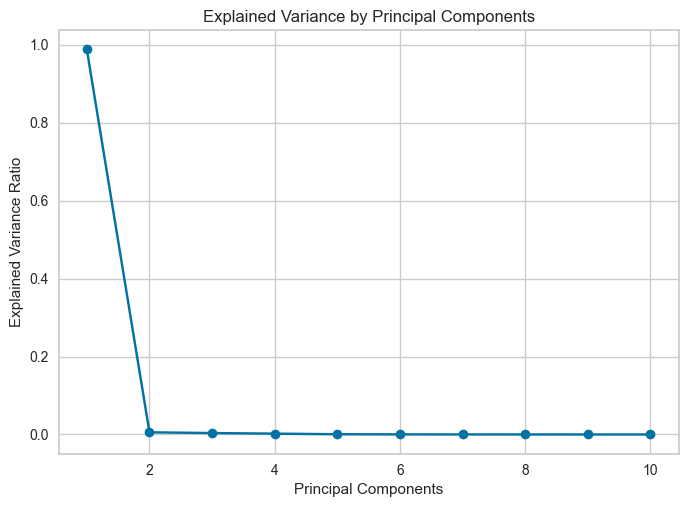

In [10]:
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o')
plt.title("Explained Variance by Principal Components")
plt.xlabel("Principal Components")
plt.ylabel("Explained Variance Ratio")
plt.show()

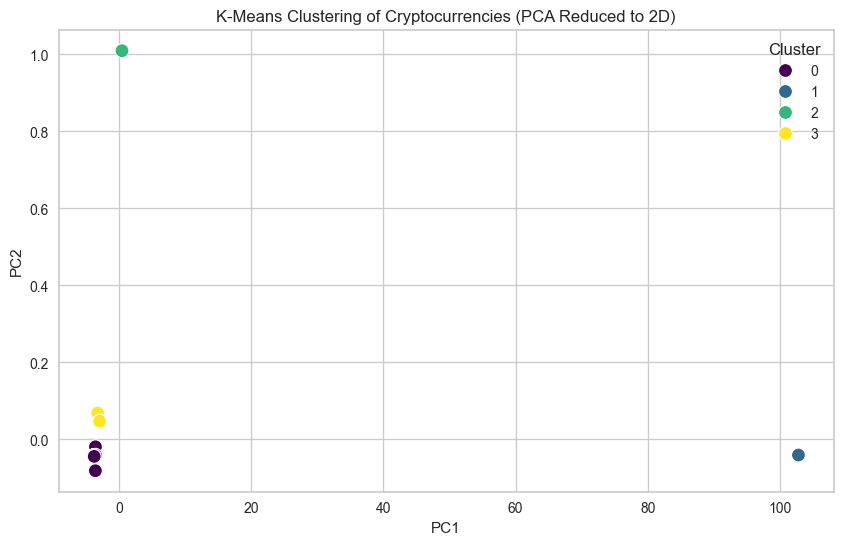

In [11]:
from sklearn.cluster import KMeans
import seaborn as sns

pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data.T)
#print(pca_result.shape)
#print(numeric_df.columns.shape)
#print(df.columns.difference(numeric_df.columns))


# Create a DataFrame with the PCA results

pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2'], index=numeric_df.columns)


# Apply K-Means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
pca_df['Cluster'] = kmeans.fit_predict(pca_result)

# Visualization of clusters in 2D (PCA space)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_df['PC1'], y=pca_df['PC2'], hue=pca_df['Cluster'], palette='viridis', s=100)
plt.title("K-Means Clustering of Cryptocurrencies (PCA Reduced to 2D)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(title="Cluster")
plt.show()


In [12]:
import numpy as np

# Get the cluster centroids
centroids = kmeans.cluster_centers_

# Find the cryptocurrency closest to each centroid
selected_cryptos = []

for i in range(4):  # 4 clusters
    cluster_points = pca_df[pca_df['Cluster'] == i]
    distances = np.linalg.norm(cluster_points[['PC1', 'PC2']].values - centroids[i], axis=1)
    closest_crypto = cluster_points.iloc[np.argmin(distances)].name
    selected_cryptos.append(closest_crypto)

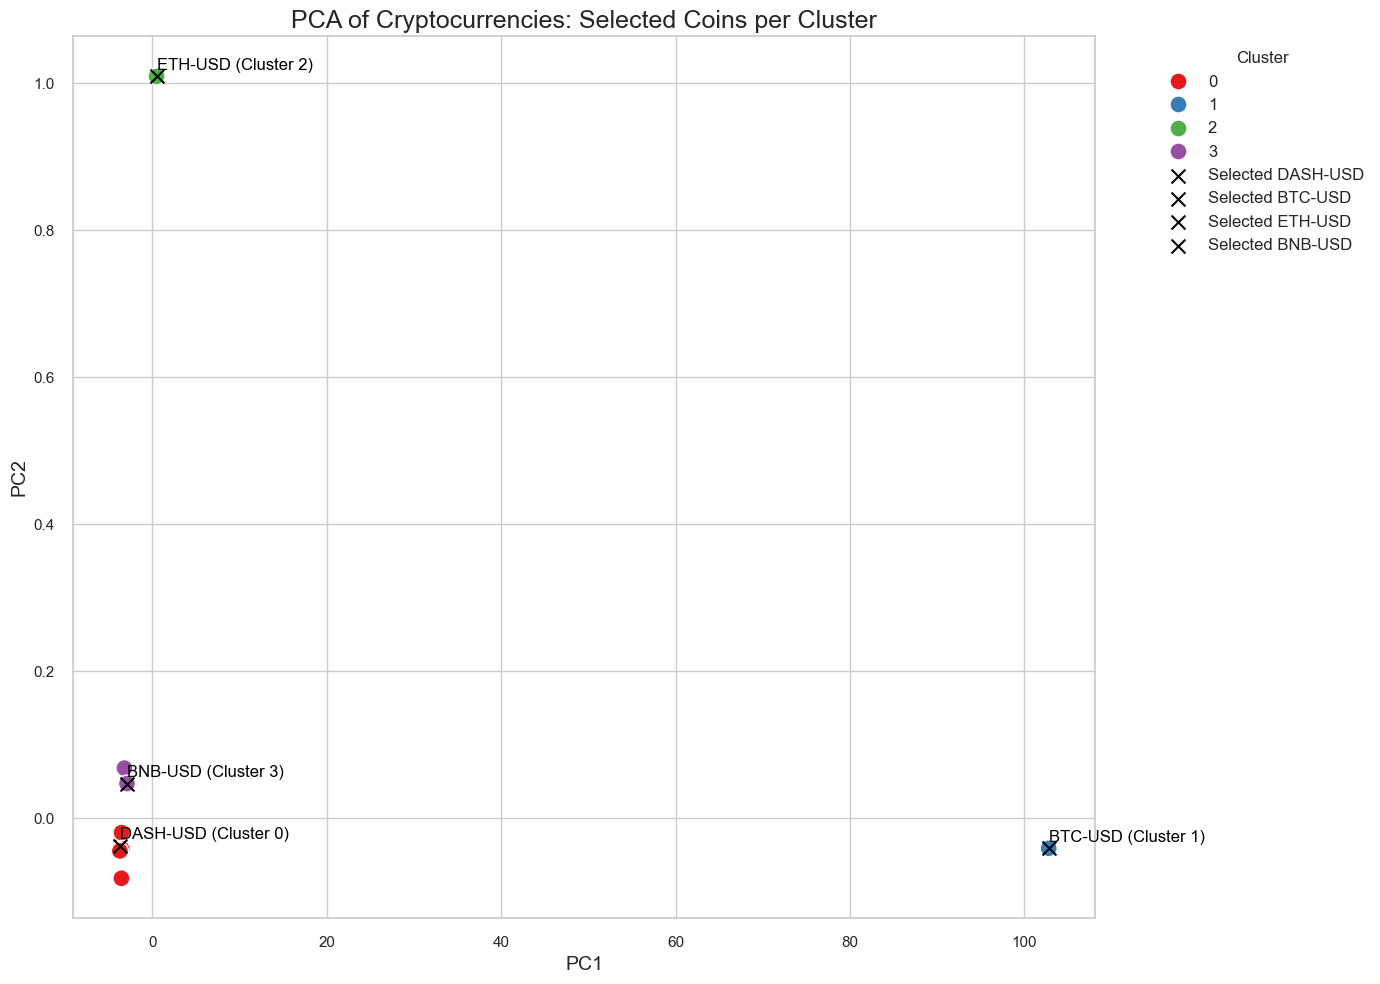

Selected Cryptocurrencies per Cluster:
Cluster 0: DASH-USD
Cluster 1: BTC-USD
Cluster 2: ETH-USD
Cluster 3: BNB-USD


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming pca_df contains the PCA results (PC1 and PC2) and the 'Cluster' column
# 'selected_cryptos' is a list containing the selected cryptocurrency names (strings)

# Create a DataFrame with PCA results and cluster labels (if not already done)
#pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2'], index=df.columns)

# Add cluster labels to the DataFrame
pca_df['Cluster'] = kmeans.labels_  # Use kmeans.labels_ instead of predict

# Define figure size and style
plt.figure(figsize=(14, 10))
sns.set(style="whitegrid")

# Plot all cryptocurrencies with cluster colors
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pca_df, palette='Set1', s=150, marker='o', legend='full')

# Highlight the selected cryptocurrencies in a larger size and a different marker
for i, crypto in enumerate(selected_cryptos):
    selected_point = pca_df.loc[crypto]
    # Plot with a different color and bigger marker for selected cryptos
    plt.scatter(selected_point['PC1'], selected_point['PC2'], color='black', s=100, label=f'Selected {crypto}', marker='x')

    # Annotate the selected cryptocurrencies with text on the plot
    plt.text(selected_point['PC1'] + 0.005, selected_point['PC2'] + 0.005, f'{crypto} (Cluster {pca_df.loc[crypto, "Cluster"]})',
             fontsize=12, ha='left', va='bottom', color='black')

# Add labels and title with a larger font
plt.title('PCA of Cryptocurrencies: Selected Coins per Cluster', fontsize=18)
plt.xlabel('PC1', fontsize=14)
plt.ylabel('PC2', fontsize=14)

# Show the legend with clearer labels
plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)
plt.grid(True)

# Show the plot with adjusted layout
plt.tight_layout()

# Display the plot
plt.show()

# Print which cryptocurrencies were selected from each cluster
print("Selected Cryptocurrencies per Cluster:")
for i in range(4):  # Assuming there are 4 clusters
    selected_in_cluster = [crypto for crypto in selected_cryptos if pca_df.loc[crypto, 'Cluster'] == i]
    print(f"Cluster {i}: {', '.join(selected_in_cluster)}")


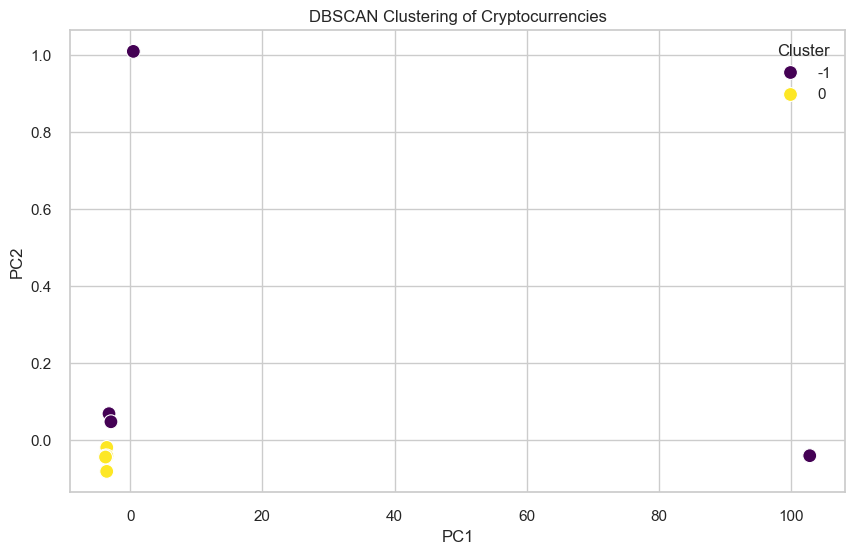

In [14]:
from sklearn.cluster import DBSCAN

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.3, min_samples=5)
pca_df['DBSCAN_Cluster'] = dbscan.fit_predict(pca_result)

# Visualize DBSCAN clustering result
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='DBSCAN_Cluster', data=pca_df, palette='viridis', s=100, marker='o')
plt.title("DBSCAN Clustering of Cryptocurrencies")
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(title='Cluster')
plt.show()

In [15]:
from sklearn.metrics import silhouette_score

# Compare K-Means and DBSCAN clustering performance
silhouette_kmeans = silhouette_score(pca_result, kmeans.labels_)
silhouette_dbscan = silhouette_score(pca_result, dbscan.labels_)

print(f"Silhouette Score for K-Means: {silhouette_kmeans}")
print(f"Silhouette Score for DBSCAN: {silhouette_dbscan}")

Silhouette Score for K-Means: 0.8087095725812177
Silhouette Score for DBSCAN: 0.7703923785252548


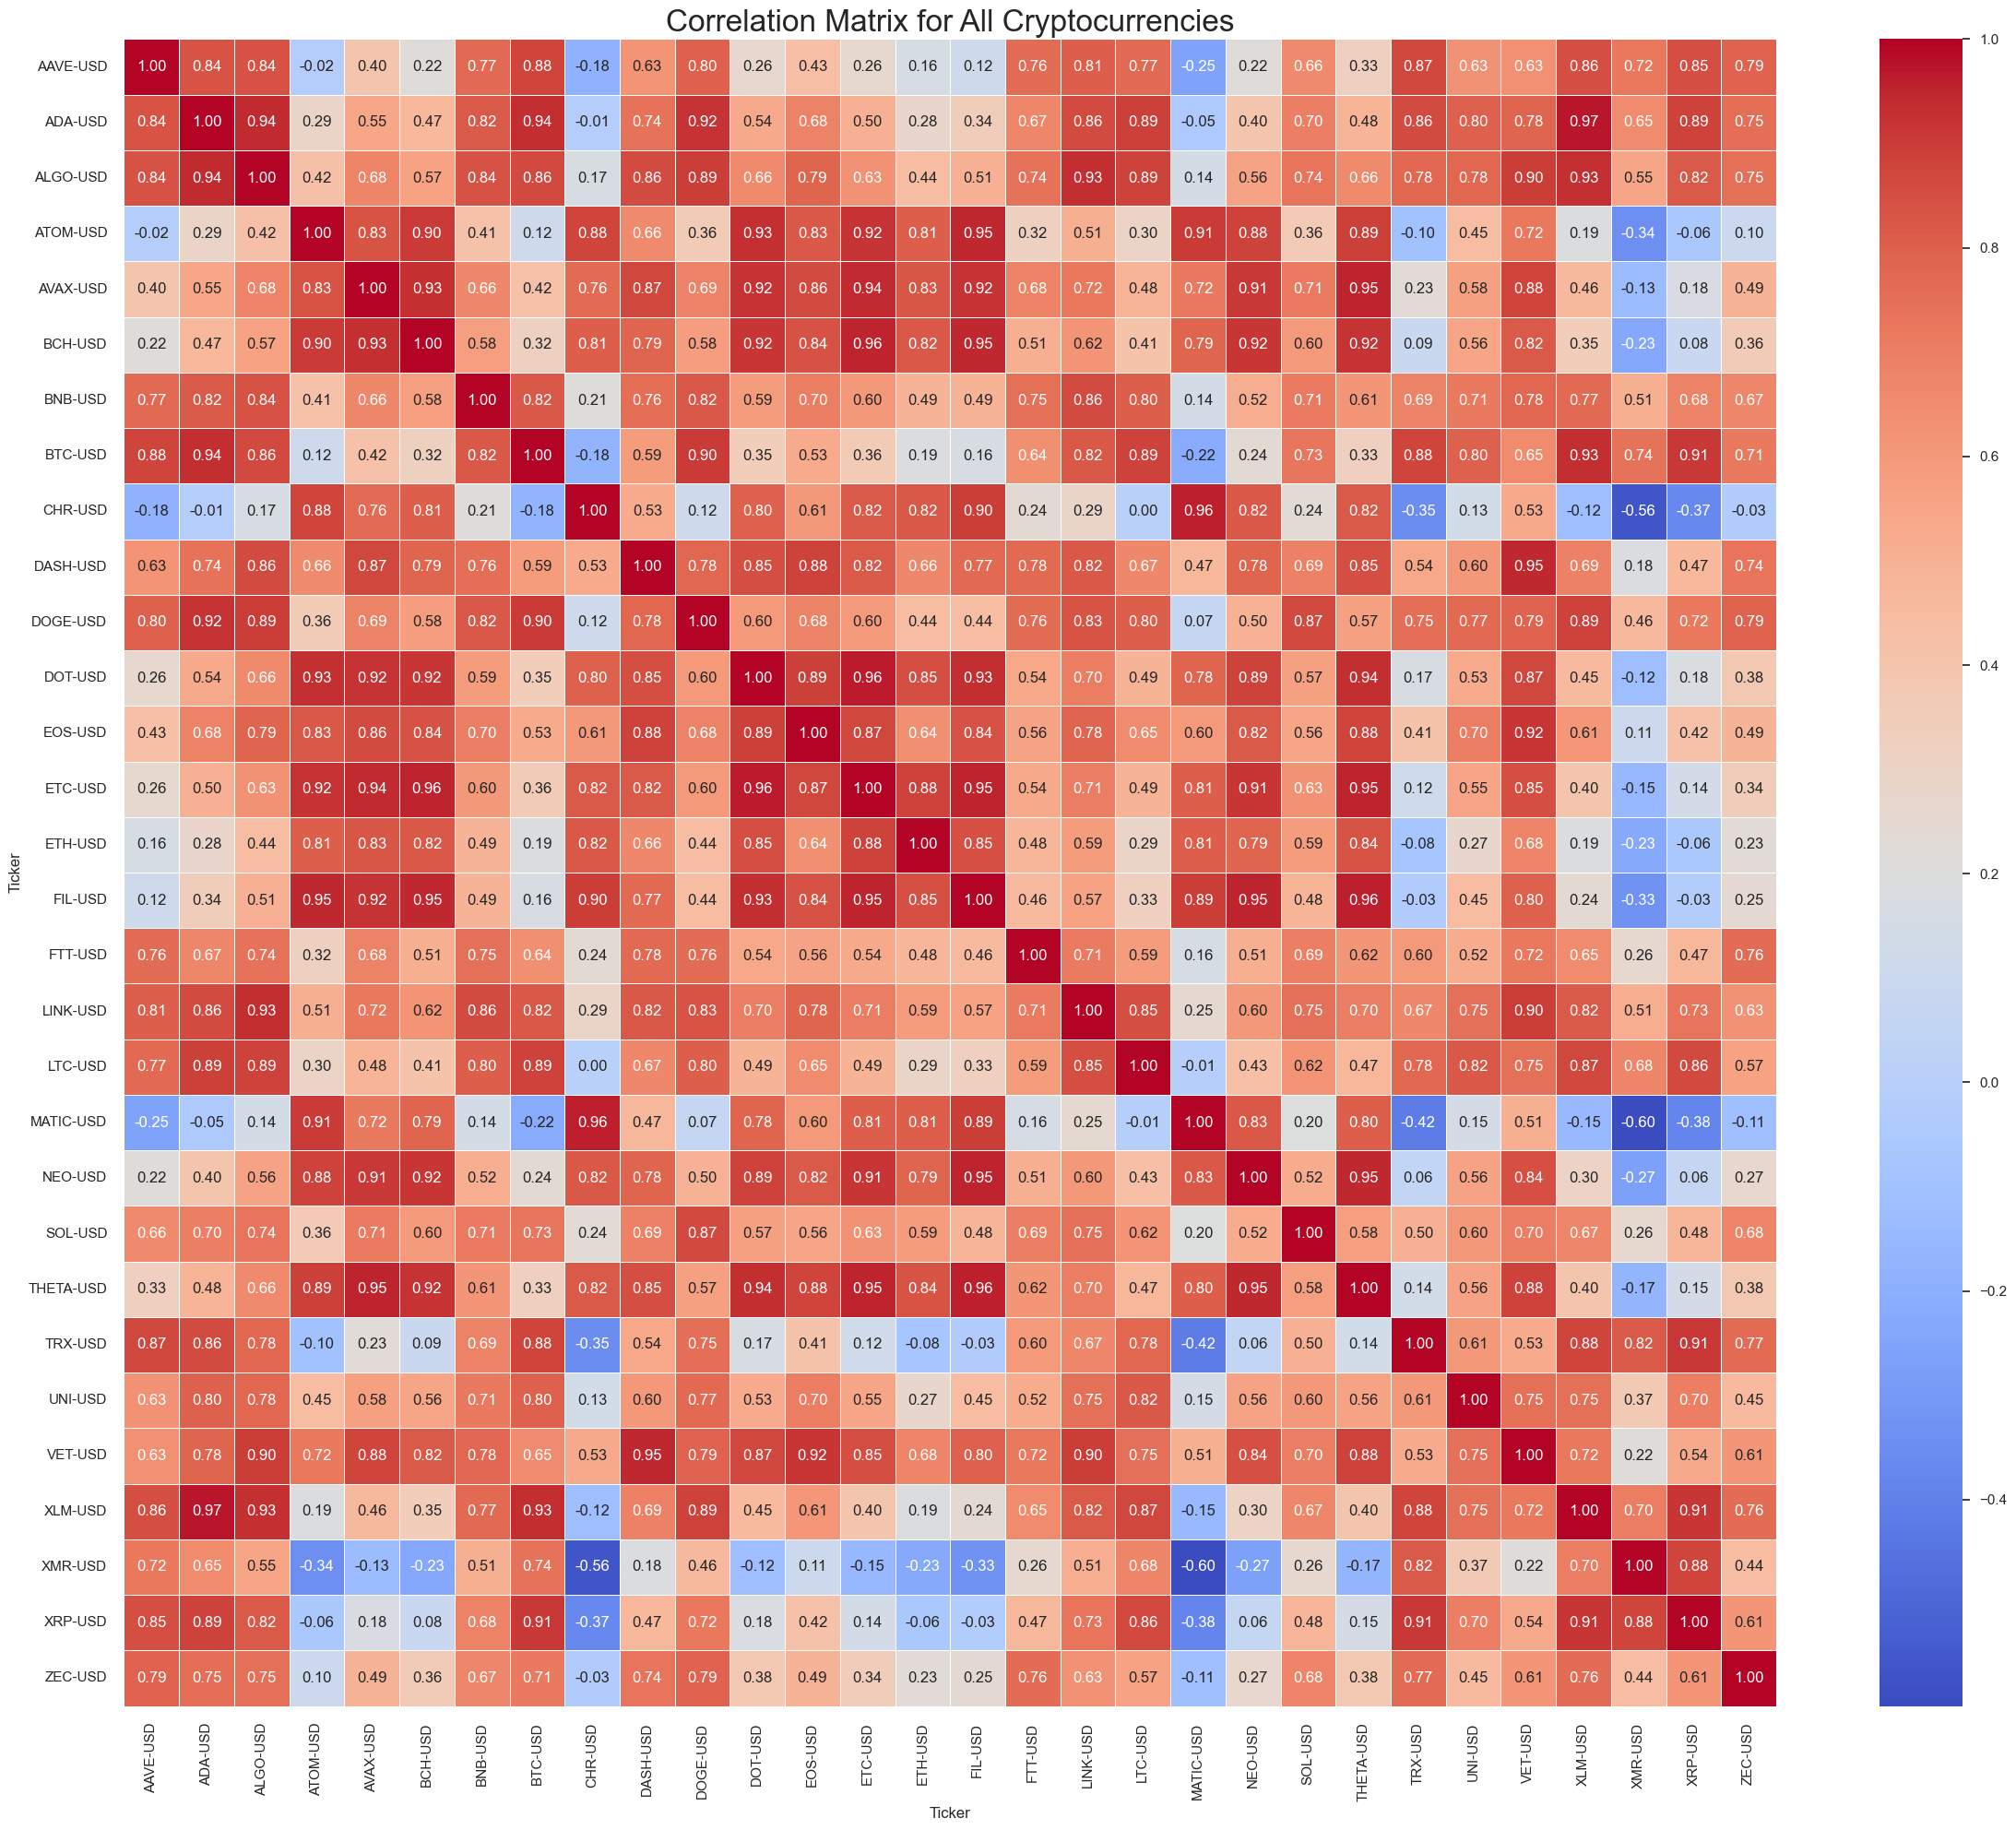

In [16]:
correlation_matrix = df.corr()

# Plot correlation matrix for all cryptocurrencies
plt.figure(figsize=(24, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True,
            xticklabels=df.columns, yticklabels=df.columns, linewidths=0.5)
plt.title('Correlation Matrix for All Cryptocurrencies', fontsize=24)
plt.tight_layout()
plt.show()

In [17]:
print(selected_cryptos)

['DASH-USD', 'BTC-USD', 'ETH-USD', 'BNB-USD']


In [18]:
# Initialize dictionary to store results
top_positive_corrs = {}
top_negative_corrs = {}

# Loop through each selected cryptocurrency
for crypto in selected_cryptos:
    # Get the correlation values for the selected cryptocurrency
    corr_values = correlation_matrix[crypto].drop(crypto)

    # Sort correlations to get positive and negative correlations
    top_positive_corrs[crypto] = corr_values[corr_values > 0].sort_values(ascending=False).head(4)
    top_negative_corrs[crypto] = corr_values[corr_values < 0].sort_values().head(4)

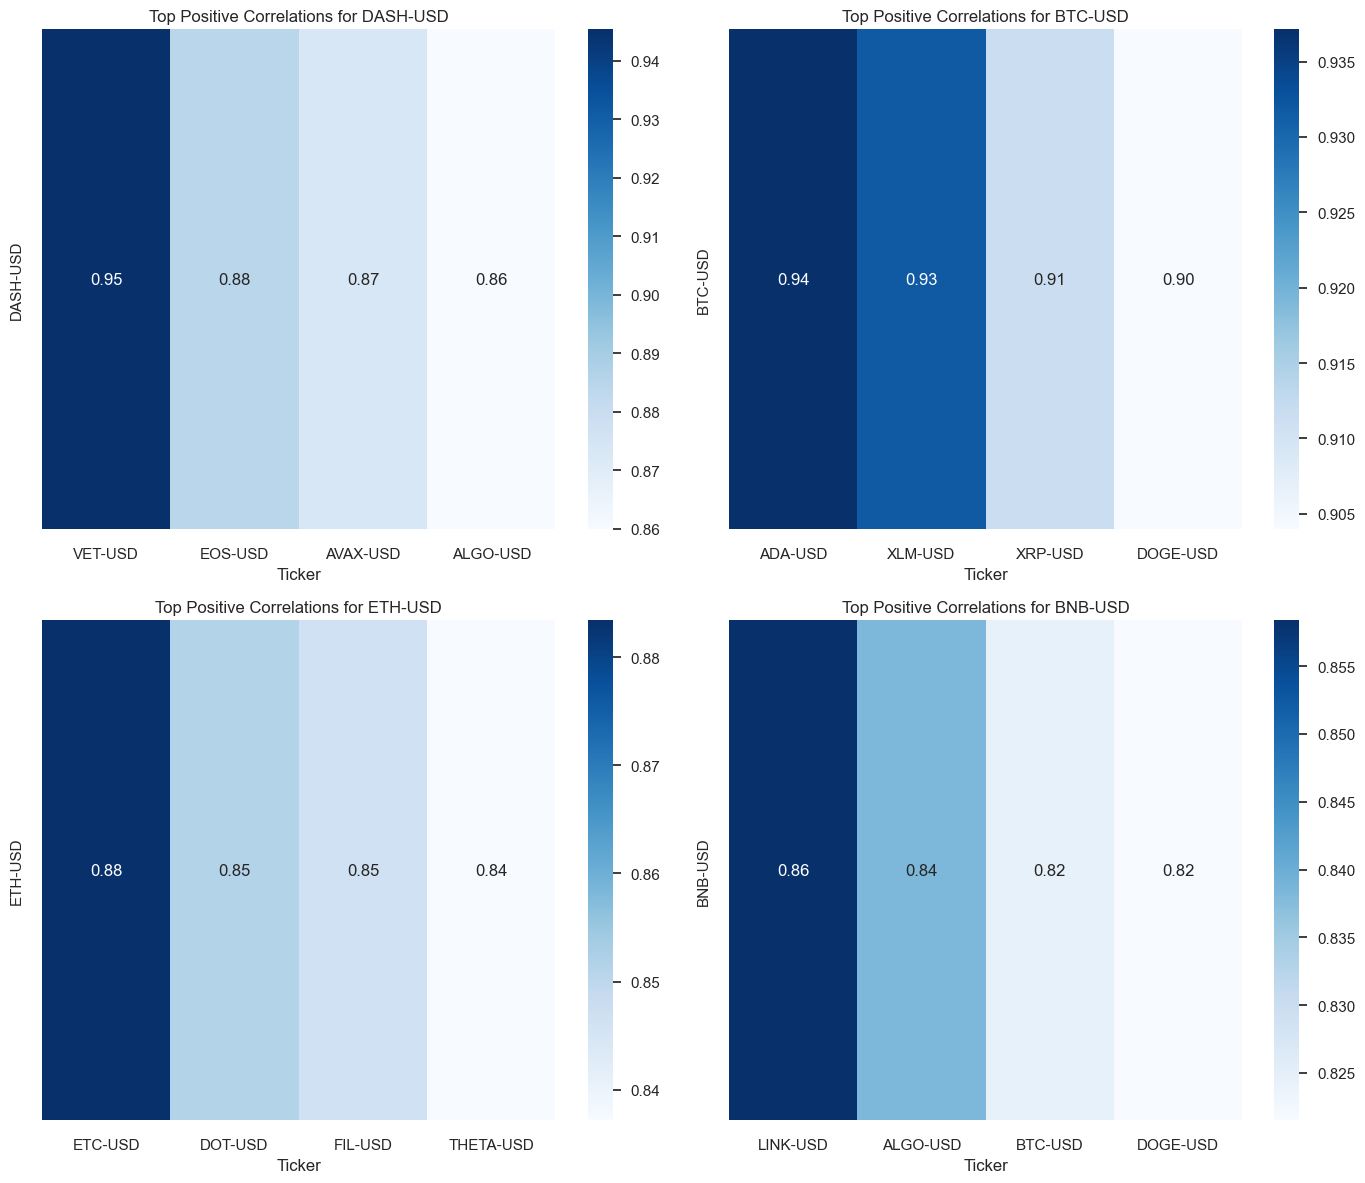

In [19]:
# Plot for top 4 positive correlations
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

for idx, crypto in enumerate(selected_cryptos):
    top_pos = top_positive_corrs[crypto]

    # Create heatmap for top positive correlations
    ax = axes[idx//2, idx%2]
    sns.heatmap(top_pos.to_frame().T, annot=True, cmap='Blues', fmt=".2f", cbar=True, ax=ax)
    ax.set_title(f'Top Positive Correlations for {crypto}')

plt.tight_layout()
plt.show()


No negative correlations found for DASH-USD
No negative correlations found for BNB-USD


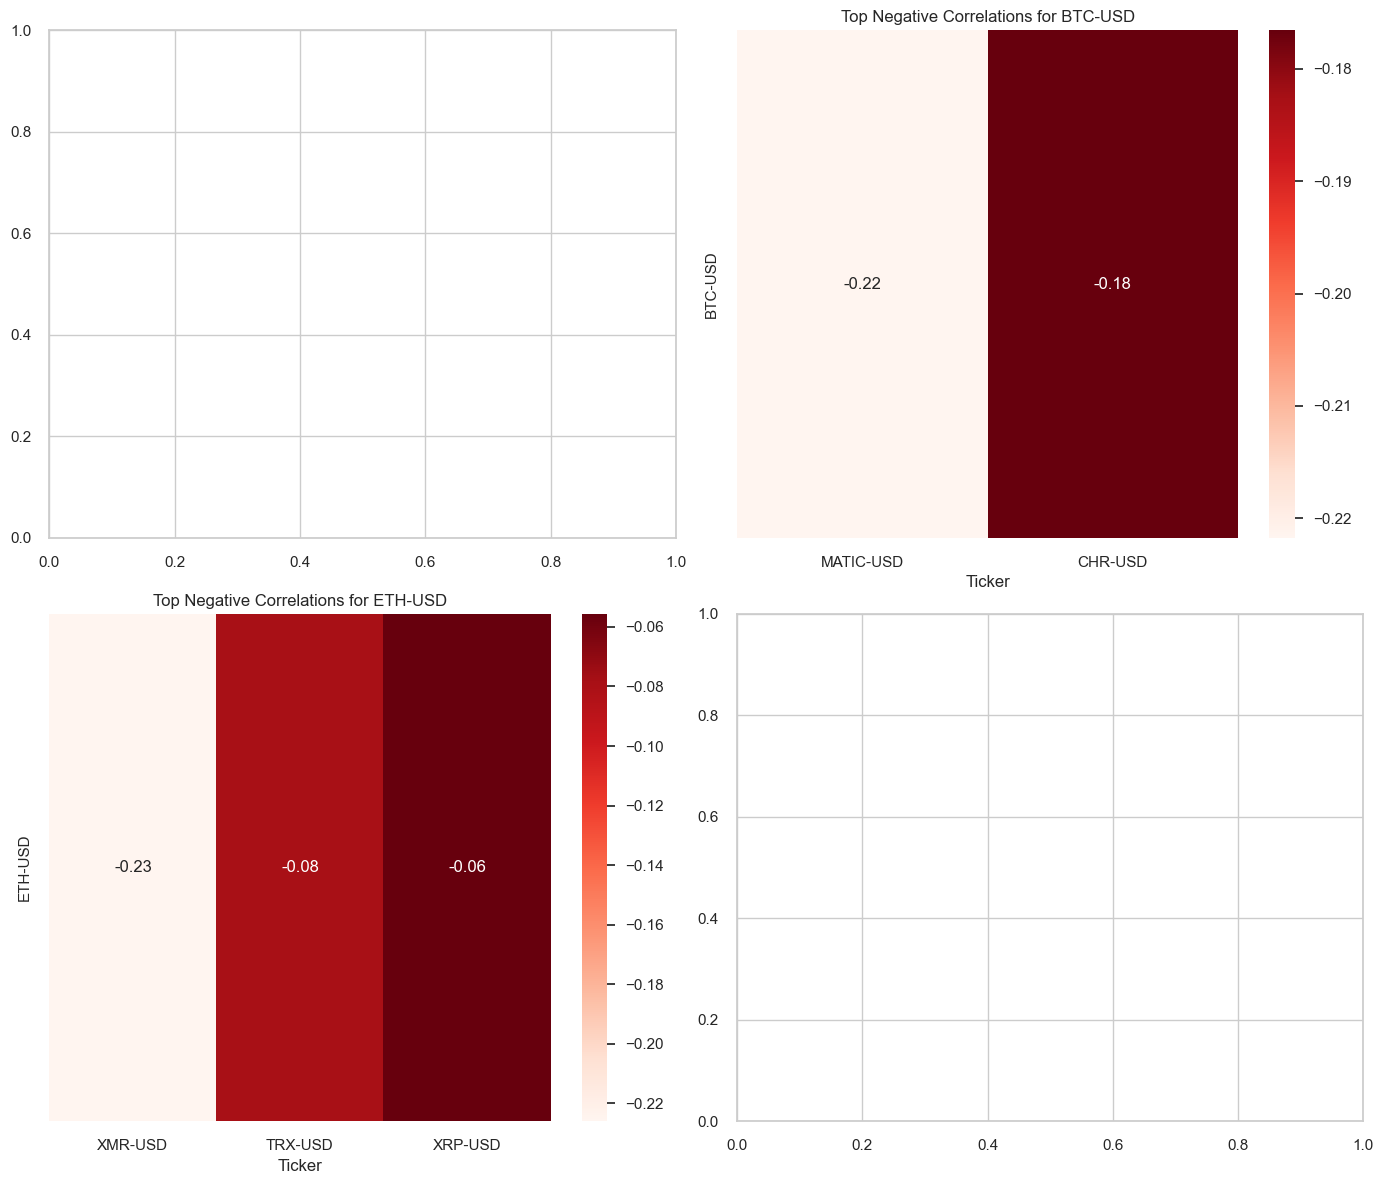

In [20]:
# Plot for top 4 negative correlations
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

for idx, crypto in enumerate(selected_cryptos):
    top_neg = top_negative_corrs[crypto]

    # Check if top_neg is empty before plotting
    if not top_neg.empty:
        # Create heatmap for top negative correlations
        ax = axes[idx//2, idx%2]
        sns.heatmap(top_neg.to_frame().T, annot=True, cmap='Reds', fmt=".2f", cbar=True, ax=ax)
        ax.set_title(f'Top Negative Correlations for {crypto}')
    else:
        # Handle empty DataFrame (e.g., print a message or skip)
        print(f"No negative correlations found for {crypto}")

plt.tight_layout()
plt.show()

In [21]:
print(selected_cryptos)

['DASH-USD', 'BTC-USD', 'ETH-USD', 'BNB-USD']


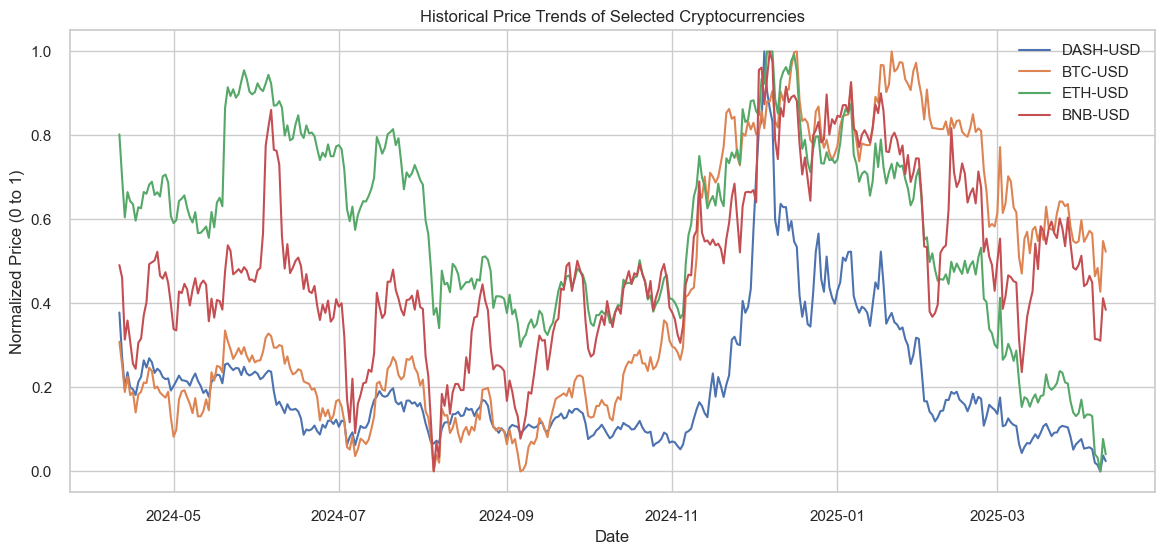

In [22]:

scaler = MinMaxScaler()
normalized_data = pd.DataFrame(scaler.fit_transform(df[selected_cryptos]),
                               columns=selected_cryptos,
                               index=df.index)

plt.figure(figsize=(14, 6))
for crypto in selected_cryptos:
    plt.plot(normalized_data.index, normalized_data[crypto], label=crypto)
plt.title("Historical Price Trends of Selected Cryptocurrencies")
plt.xlabel("Date")
plt.ylabel("Normalized Price (0 to 1)")
plt.legend()
plt.grid(True)
plt.show()

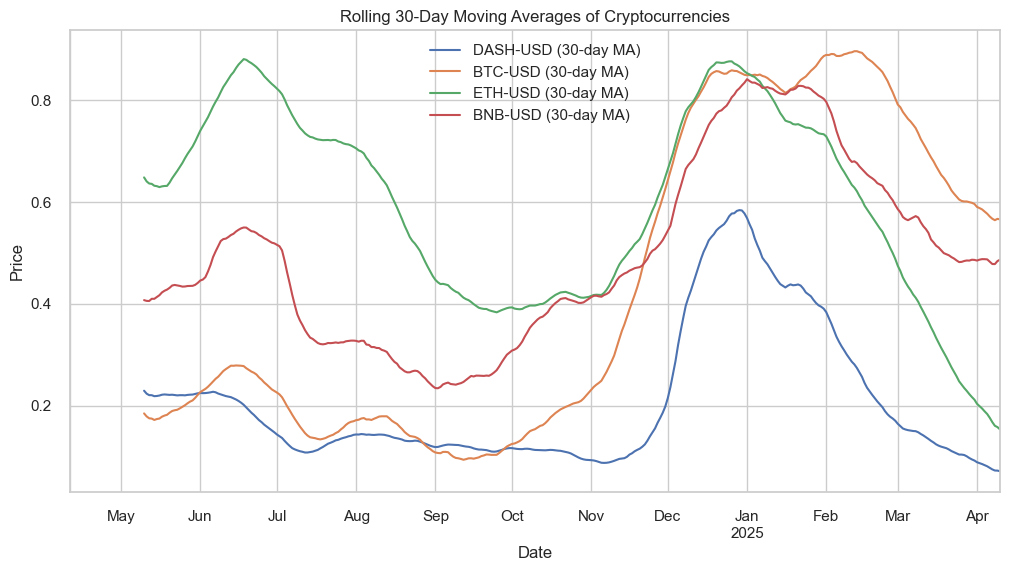

In [23]:
plt.figure(figsize=(12, 6))

for crypto in selected_cryptos:
    normalized_data[crypto].rolling(window=30).mean().plot(label=f"{crypto} (30-day MA)")

plt.title("Rolling 30-Day Moving Averages of Cryptocurrencies")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()

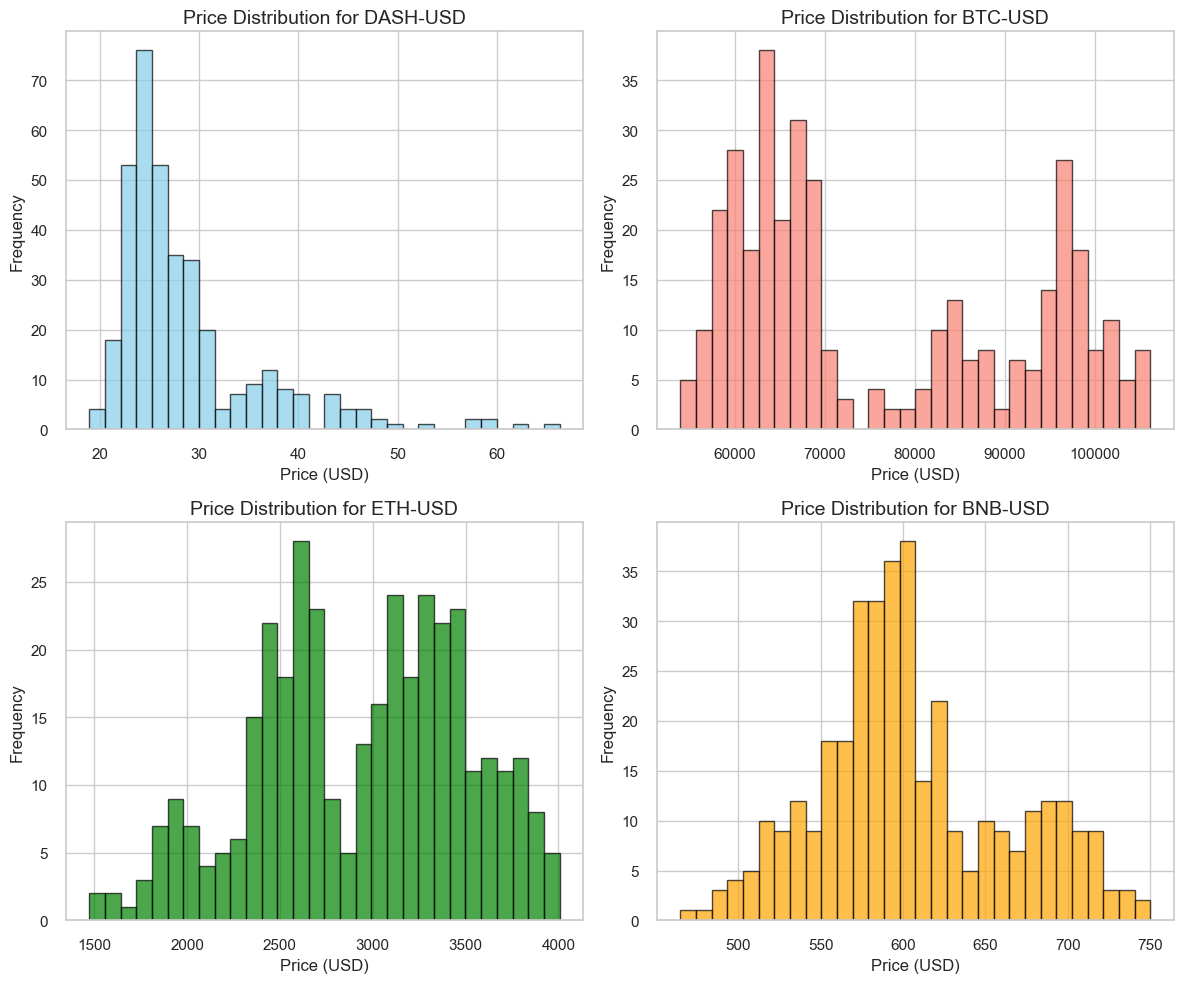

In [24]:
# Set the number of bins to control the granularity of price distribution
bins = 30

# Define a list of colors (you can choose from a variety of colors available in matplotlib or seaborn)
colors = ['skyblue', 'salmon', 'green', 'orange']  # One color for each selected crypto

# Create a figure with subplots (4 rows x 1 column for each selected cryptocurrency)
plt.figure(figsize=(12, 10))

# Iterate over the selected cryptocurrencies
for i, crypto in enumerate(selected_cryptos):
    plt.subplot(2, 2, i+1)  # Create 2x2 subplots, and i+1 to iterate over the subplots

    # Get the price data for the selected cryptocurrency
    crypto_prices = df[crypto]

    # Plot the histogram with a unique color for each cryptocurrency
    plt.hist(crypto_prices, bins=bins, color=colors[i], edgecolor='black', alpha=0.7)

    # Add titles and labels
    plt.title(f'Price Distribution for {crypto}', fontsize=14)
    plt.xlabel('Price (USD)', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)

# Adjust layout and display
plt.tight_layout()
plt.show()

In [25]:
print(selected_cryptos)

['DASH-USD', 'BTC-USD', 'ETH-USD', 'BNB-USD']


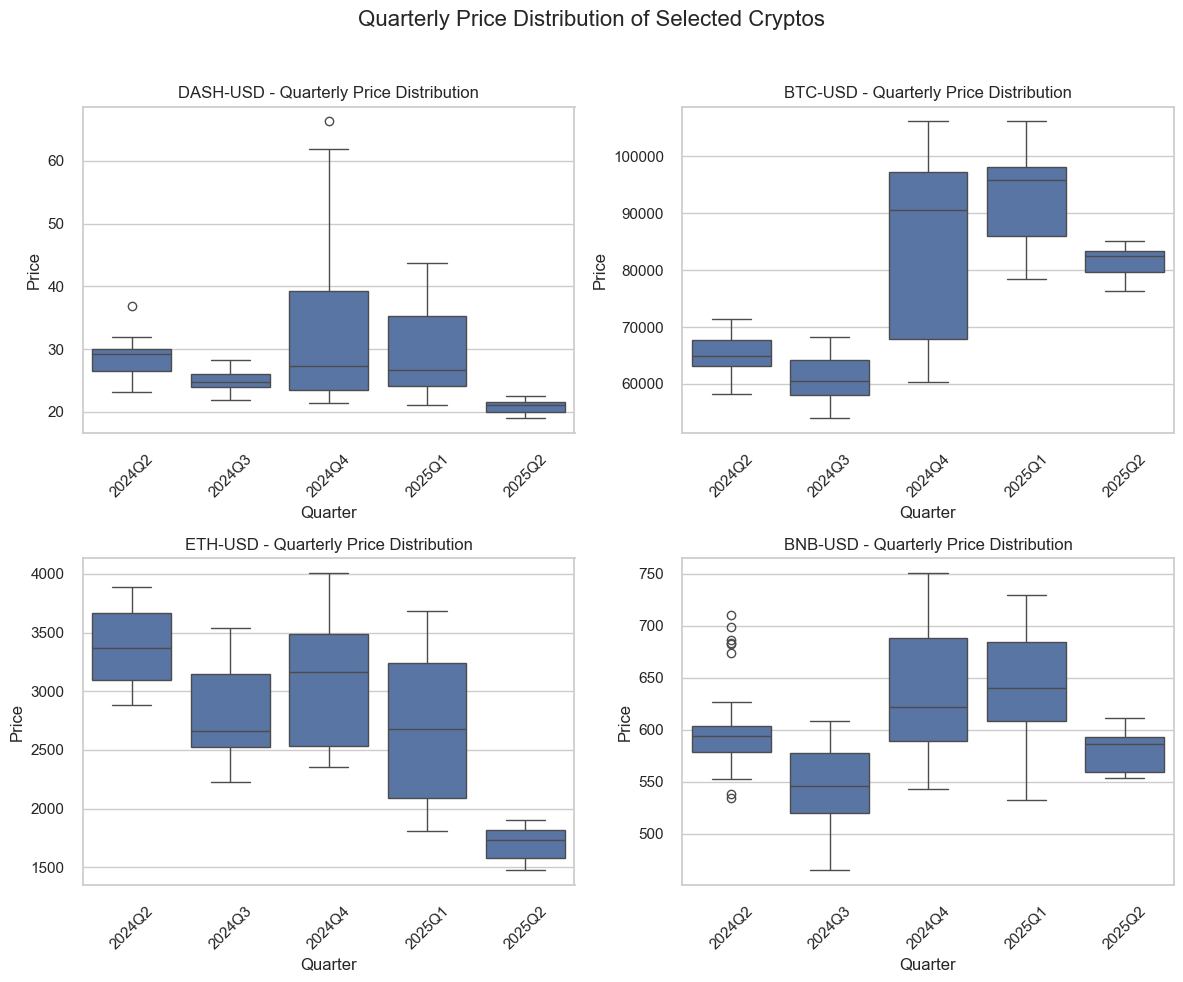

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a new column for quarters
df['Quarter'] = df.index.to_period('Q')

# Set up the 2x2 plot
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle("Quarterly Price Distribution of Selected Cryptos", fontsize=16)

# Flatten axes for easy iteration
axes = axes.flatten()

# Plot each selected crypto
for i, crypto in enumerate(selected_cryptos):
    sns.boxplot(x=df['Quarter'].astype(str), y=df[crypto], ax=axes[i])
    axes[i].set_title(f"{crypto} - Quarterly Price Distribution")
    axes[i].set_xlabel("Quarter")
    axes[i].set_ylabel("Price")
    axes[i].tick_params(axis='x', rotation=45)  # Rotate x-axis for readability

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit the title
plt.show()


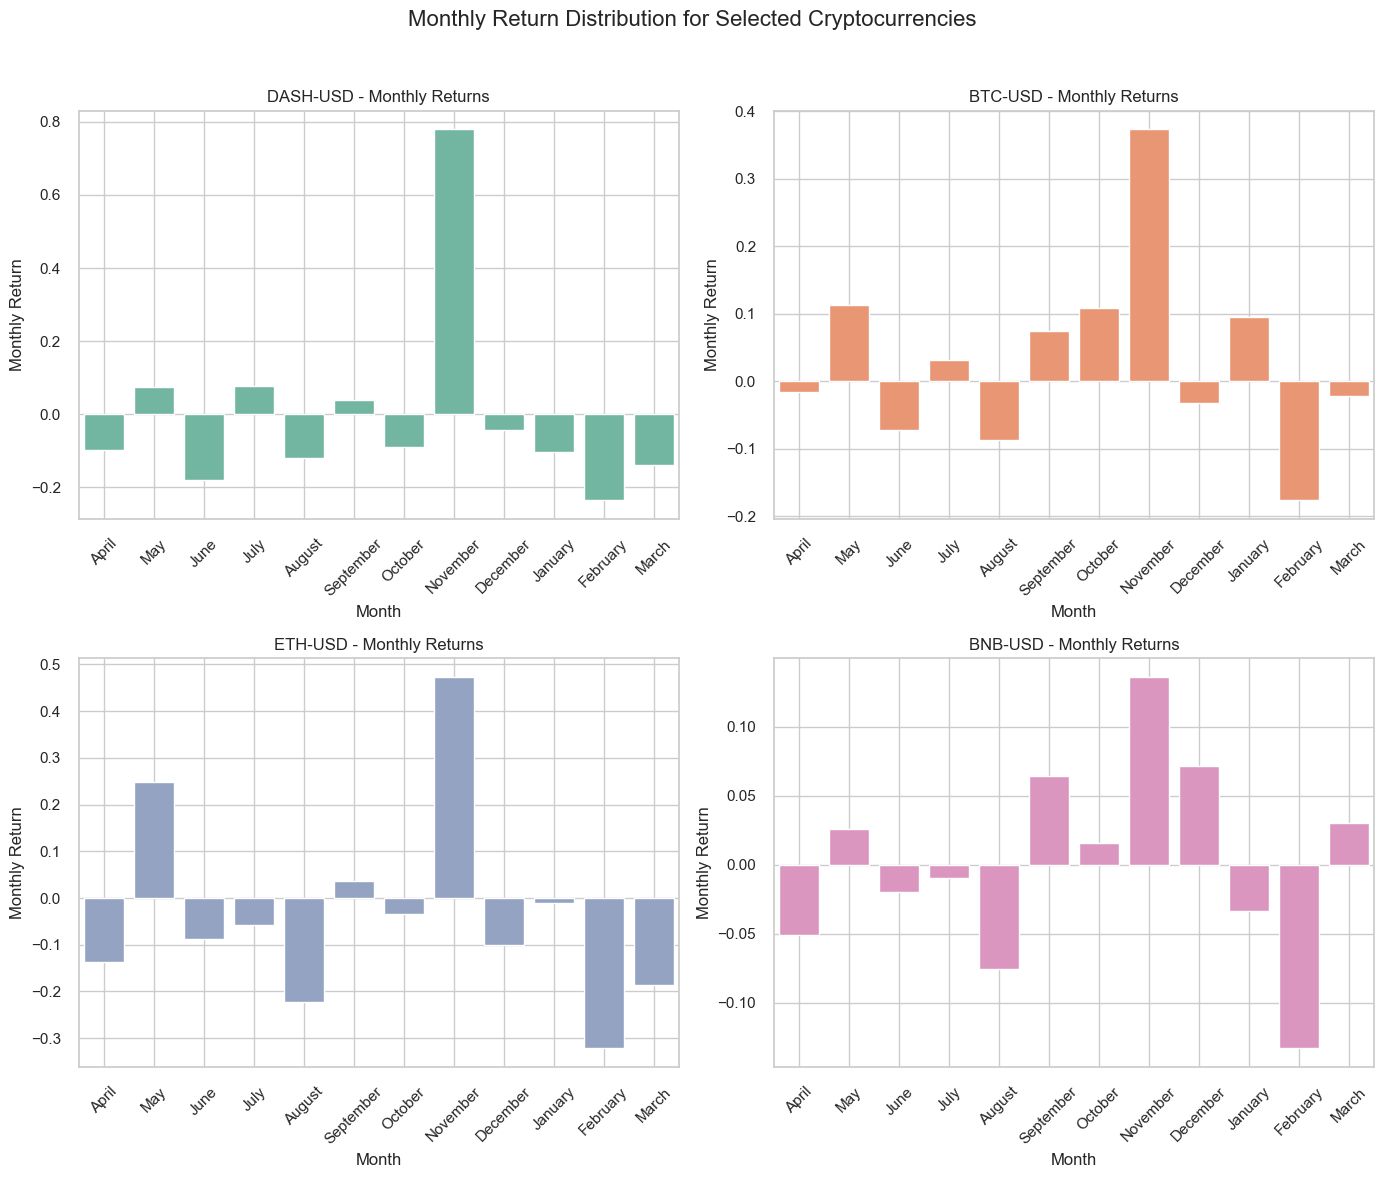

In [27]:
# Calculate Monthly Returns for each selected cryptocurrency
monthly_returns = df[selected_cryptos].resample('M').ffill().pct_change()

# Get the month names
monthly_returns.index = monthly_returns.index.month_name()  # This will convert the index to month names

# Define a color palette for each cryptocurrency
colors = sns.color_palette("Set2", len(selected_cryptos))  # A distinct color for each cryptocurrency

# Create subplots for each cryptocurrency
fig, axes = plt.subplots(2, 2, figsize=(14, 12))
fig.suptitle("Monthly Return Distribution for Selected Cryptocurrencies", fontsize=16)

# Flatten axes for easy iteration
axes = axes.flatten()

# Plot monthly returns with a distinct color for each cryptocurrency
for i, crypto in enumerate(selected_cryptos):
    sns.barplot(x=monthly_returns.index, y=monthly_returns[crypto], ax=axes[i], color=colors[i])  # Assign unique color
    axes[i].set_title(f"{crypto} - Monthly Returns")
    axes[i].set_xlabel("Month")
    axes[i].set_ylabel("Monthly Return")
    axes[i].set_xticklabels(monthly_returns.index, rotation=45)  # Rotate month names for readability
    axes[i].grid(True)

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust the title layout
plt.show()


30 cryptocurries DataFrame 

In [28]:
# prompt: can you extract the data from the orignal dataframe of each cryptocurrency and save it in different dataframe?

# Assuming df is your original dataframe with all cryptocurrency data

crypto_dataframes = {}

for crypto in crypto_list:
  if crypto in df.columns:  # Check if the cryptocurrency exists in the original DataFrame
    crypto_dataframes[crypto] = df[[crypto]].copy() # Create a new dataframe with only the specified crypto's data. Use copy() to avoid SettingWithCopyWarning.
  else:
    print(f"Warning: Data for {crypto} not found in the original dataframe.")

# Now crypto_dataframes dictionary contains individual dataframes for each cryptocurrency
# Example: To access the dataframe for Bitcoin:
bitcoin_df = crypto_dataframes['BTC-USD']
bitcoin_df.head()



Ticker,BTC-USD
Date,
2024-04-11,70060.609375
2024-04-12,67195.867188
2024-04-13,63821.472656
2024-04-14,65738.726562
2024-04-15,63426.210938


In [29]:
from pycaret.classification import *


In [30]:
 #Setup PyCaret environment
from pycaret.time_series import setup, compare_models

s = setup(data=bitcoin_df, target='BTC-USD',
          fh=30, 
          seasonal_period='D', fold=5, session_id=123)

# Compare models
best_model = compare_models(
    sort='R2'
    )

,Description,Value
0,session_id,123
1,Target,BTC-USD
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(365, 1)"
5,Transformed data shape,"(365, 1)"
6,Transformed train set shape,"(335, 1)"
7,Transformed test set shape,"(30, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
exp_smooth,Exponential Smoothing,1.5690,1.4834,5411.3357,6680.3411,0.0612,0.0610,-1.2684,0.0560
ets,ETS,1.7072,1.5992,5873.7559,7190.1117,0.0659,0.0660,-1.7045,0.0440
naive,Naive Forecaster,1.7530,1.6283,5971.0704,7230.2599,0.0673,0.0688,-1.8474,1.2580
ada_cds_dt,AdaBoost w/ Cond. Deseasonalize & Detrending,1.8586,1.7299,6321.5544,7672.1879,0.0720,0.0736,-2.0854,0.3660
theta,Theta Forecaster,1.8619,1.7304,6341.7114,7689.6808,0.0720,0.0732,-2.1124,0.0340
omp_cds_dt,Orthogonal Matching Pursuit w/ Cond. Deseasonalize & Detrending,1.9521,1.7977,6630.5970,7959.3416,0.0764,0.0782,-2.2669,0.2960
xgboost_cds_dt,Extreme Gradient Boosting w/ Cond. Deseasonalize & Detrending,1.9313,1.7373,6552.4718,7670.1213,0.0742,0.0767,-2.3008,0.3800
dt_cds_dt,Decision Tree w/ Cond. Deseasonalize & Detrending,1.9992,1.7629,6726.7472,7722.4059,0.0778,0.0820,-2.3256,0.2760
gbr_cds_dt,Gradient Boosting w/ Cond. Deseasonalize & Detrending,1.8527,1.7799,6297.8391,7851.0809,0.0712,0.0736,-2.3341,0.3220
et_cds_dt,Extra Trees w/ Cond. Deseasonalize & Detrending,2.0233,1.8000,6812.4337,7866.9851,0.0774,0.0812,-2.7023,0.4900


In [43]:
from pycaret.time_series import create_model
from pycaret.time_series import models
models()

# Prophet
#prophet_model = create_model('prophet')

# Support Vector Regression (SVR)
#svr_model = create_model('svr')

# ARIMA
arima_model = create_model('arima')

# SARIMA (Seasonal ARIMA)
arima_seasonal = create_model('arima', seasonal=True, m=12)  # m=12 for yearly seasonality if data is monthly


,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,2024-10-12,2.7674,2.5825,8581.2428,10079.8407,0.1177,0.1273,-2.9100
1,2024-11-11,4.6410,3.7929,15246.9182,16185.9235,0.1586,0.1740,-16.8395
2,2024-12-11,1.2989,1.1259,4619.8575,5371.1084,0.0477,0.0467,-1.1562
3,2025-01-10,1.2584,1.1831,4553.2068,5678.5053,0.0446,0.0459,-1.5401
4,2025-02-09,1.9967,2.0169,7360.9313,9781.9928,0.0857,0.0795,-1.7401
Mean,NaT,2.3925,2.1403,8072.4313,9419.4741,0.0909,0.0947,-4.8372
SD,NaT,1.2518,0.9886,3912.6357,3917.5618,0.0432,0.0496,6.0296


,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,15:18:54
Status,. . . . . . . . . . . . . . . . . .,Selecting Estimator
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


TypeError: __init__() got an unexpected keyword argument 'seasonal'

In [ ]:
from pycaret.time_series import *
setup = setup(bitcoin_df, target='BTC-USD', seasonal_period=12)  # Adjust seasonal_period as needed

,Description,Value
0,session_id,8905
1,Target,BTC-USD
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(365, 1)"
5,Transformed data shape,"(365, 1)"
6,Transformed train set shape,"(364, 1)"
7,Transformed test set shape,"(1, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


In [48]:
arima = create_model('arima', order=(1, 1, 1))  # Manually specify (p, d, q) or let PyCaret auto-select


,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE
0,2025-04-06,0.2480,0.1890,1187.8791,1187.8791,0.0150,0.0151
1,2025-04-07,0.6884,0.5252,3302.7739,3302.7739,0.0433,0.0424
2,2025-04-08,1.8498,1.4124,8907.4479,8907.4479,0.1079,0.1140
Mean,NaT,0.9287,0.7089,4466.0337,4466.0337,0.0554,0.0572
SD,NaT,0.6757,0.5160,3257.0760,3257.0760,0.0389,0.0417


In [54]:
best_arima = create_model('arima')  # Auto-selects parameters

# View the selected order
print(best_arima.get_params()['order']) 
from pmdarima import auto_arima

# Auto-tune with seasonality (for SARIMA)
model = auto_arima(bitcoin_df,
                   seasonal=True,  # Set False for non-seasonal ARIMA
                   m=12,           # Seasonal period (12 for monthly data)
                   stepwise=True,   # Faster search
                   trace=True)     # Show progress

print(model.summary())
auto_arima(bitcoin_df,
           start_p=0, max_p=5,    # AR terms range
           start_q=0, max_q=5,    # MA terms range
           d=None,                # Auto-detect differencing
           test='adf',           # Stationarity test
           seasonal=False,        # Set True for SARIMA
           information_criterion='aic',  # Model selection criterion
           trace=True,
           error_action='ignore',
           suppress_warnings=True)

# Check residuals
plot_model(best_arima, plot='diagnostics')  # Note the 's' at the end


# Forecast
predictions = predict_model(best_arima, fh=12)

# Plot with future horizon
plot_model(best_arima, plot='forecast') 
final_model = finalize_model(best_arima)  # Refit on entire data
plot_model(final_model, plot='forecast', fh=12)

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE
0,2025-04-06,0.3174,0.2419,1520.3204,1520.3204,0.0192,0.0190
1,2025-04-07,1.2128,0.9253,5818.7926,5818.7926,0.0763,0.0735
2,2025-04-08,1.1474,0.8761,5525.0667,5525.0667,0.0669,0.0692
Mean,NaT,0.8925,0.6811,4288.0599,4288.0599,0.0541,0.0539
SD,NaT,0.4075,0.3112,1960.7576,1960.7576,0.0250,0.0247


(1, 0, 0)
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=6597.923, Time=0.53 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=6595.427, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=6595.250, Time=0.06 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=6594.923, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=6593.509, Time=0.01 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=6597.249, Time=0.04 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=6597.258, Time=0.04 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=6599.111, Time=0.15 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=6593.405, Time=0.02 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=6595.258, Time=0.09 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=6597.113, Time=0.28 sec
 ARIMA(2,1,0)(0,0,0)[12] intercept   : AIC=6593.594, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=6593.362, Time=0.07 sec
 ARIMA(1,1,1)(1,0,0)[12] intercept   : AIC=6595.179, Time=0.18 sec
 ARIMA(1,

TypeError: plot_model() got an unexpected keyword argument 'fh'